In [1]:
%run eval.ipynb
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from utils import eval, visual, save, save_model
from model import Model
import warnings
warnings.filterwarnings('ignore')

In [2]:

np.random.seed(42)
data = pd.read_csv('data/compound_feat1.csv').iloc[:,1:]
data['target'] = pd.qcut(data['label'], q=10, labels=False)
train_df, test_df = train_test_split(data, test_size=0.2, stratify=data['target'], random_state=43)

samples = train_df[train_df['label'] < 1.2]
train_df = pd.concat([train_df, samples], axis=0)
#train_df = pd.concat([train_df, samples], axis=0)
train_df = train_df.sample(frac=1).reset_index(drop=True)


train_df = train_df.drop(columns=['target'])
test_df = test_df.drop(columns=['target'])

X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1:].values
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1:].values

print('train data:', X_train.shape)
print('X_test data:', X_test.shape)

train data: (101, 29)
X_test data: (22, 29)


# 1.DecisionTree_model

DecisionTree train: 
 r2: 1.0  rmse: 0.0  mse:0.0 error_ratio:0.0% mae:0.0
DecisionTree test: 
 r2: 0.6594410225015306  rmse: 0.21226056028981327 mse:0.04505454545454545 error_ratio:12.53% mae:0.1481818181818182
save result successful！


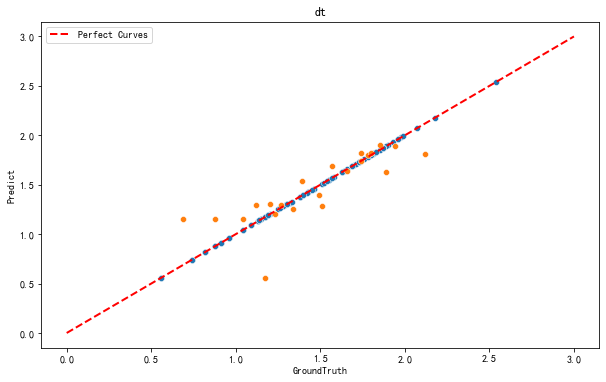

In [3]:
DecisionTree_model = DecisionTreeRegressor(random_state=25)


model = Model(DecisionTree_model, X_train, X_test, y_train, y_test, 'DecisionTree', '1')


visual(DecisionTree_model, 'dt', X_train, X_test, y_train, y_test)



DecisionTree_tuning train: 
 r2: 0.8677041892943713  rmse: 0.13734120743872202  mse:0.018862607260726073 error_ratio:7.07% mae:0.08811551155115512
DecisionTree_tuning test: 
 r2: 0.8341328263929667  rmse: 0.14813352647752187 mse:0.021943541666666674 error_ratio:8.57% mae:0.11623484848484851
save result successful！


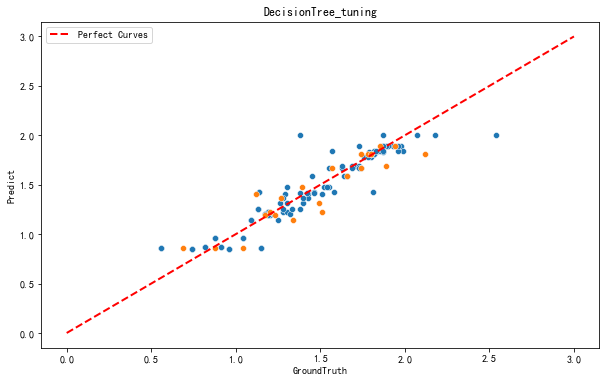

In [4]:
import numpy as np
from sklearn.model_selection import GridSearchCV


DT_param = {'max_depth':[3,5,7,9,10,11],
              'max_leaf_nodes':[25,30,40,50,60,70],
              'min_samples_leaf':[2,3,4,5,6,7,8],
}



D_model = DecisionTreeRegressor()
D_grid_search = GridSearchCV(D_model,DT_param,scoring='neg_mean_squared_error',cv=5)

model = Model(D_grid_search, X_train, X_test, y_train, y_test, 'DecisionTree_tuning', '1')

visual(model, 'DecisionTree_tuning', X_train, X_test, y_train, y_test)
    



# 2.RandomForest_model

RandomForest train: 
 r2: 0.9739472837678828  rmse: 0.060947278791421255  mse:0.003714570792079227 error_ratio:2.78% mae:0.03860495049504963
RandomForest test: 
 r2: 0.7643741941428545  rmse: 0.1765568476569107 mse:0.031172320454545575 error_ratio:9.68% mae:0.13185909090909112
save result successful！


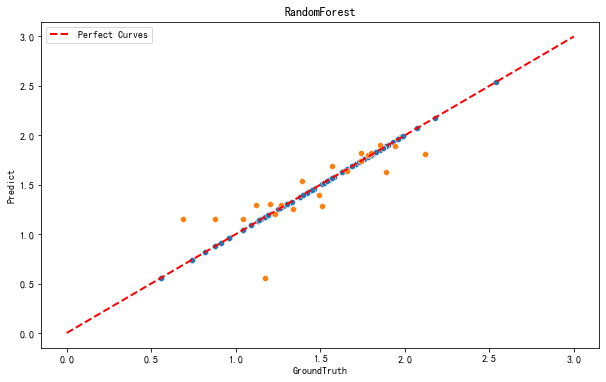

In [5]:
RandomForest_model =RandomForestRegressor(random_state=2024)  #n_estimators=300, max_depth=10, random_state=2023

model = Model(RandomForest_model, X_train, X_test, y_train, y_test, 'RandomForest', '1')

visual(DecisionTree_model, 'RandomForest', X_train, X_test, y_train, y_test)

RandomForest_tuning train: 
 r2: 0.9204104395009725  rmse: 0.10652606099289637  mse:0.011347801670662279 error_ratio:6.33% mae:0.08127629898451884
RandomForest_tuning test: 
 r2: 0.7295094708796406  rmse: 0.18916865298765645 mse:0.03578477927316438 error_ratio:11.23% mae:0.15233648962695043
save result successful！


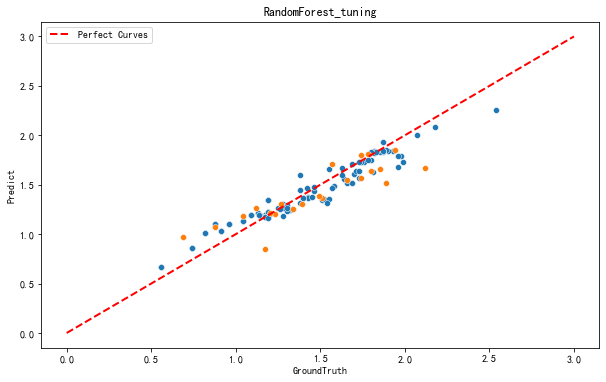

In [6]:

from sklearn.model_selection import GridSearchCV
rf_param = {
    'n_estimators': [300,400,500],
    'max_depth': [3,4,5],
#     'ccp_alpha': [0.0,0.05,0.1],
    'random_state': [2024]
}

rf_model = RandomForestRegressor(random_state=2024)


rf_grid_search = GridSearchCV(rf_model, rf_param, cv=5, scoring='neg_mean_squared_error')

model = Model(rf_grid_search, X_train, X_test, y_train, y_test, 'RandomForest_tuning', '1')

visual(model, 'RandomForest_tuning', X_train, X_test, y_train, y_test)

# 3. Linear_model

linear_reg train: 
 r2: 0.8307399365483847  rmse: 0.15534778483715087  mse:0.024132934253809718 error_ratio:9.73% mae:0.12189837855701524
linear_reg test: 
 r2: 0.6719076546902072  rmse: 0.2083392942557706 mse:0.04340526153099257 error_ratio:8.61% mae:0.13016645638614033
save result successful！


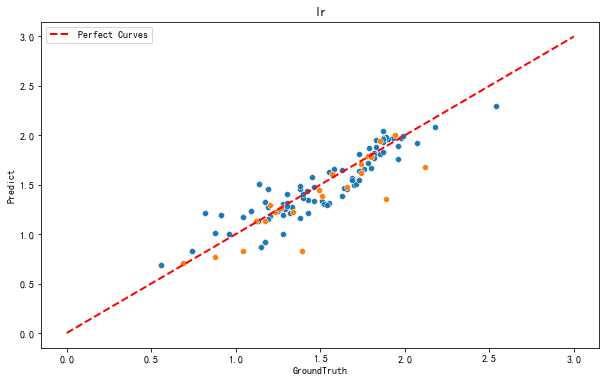

In [7]:
Linear_model = LinearRegression()

model = Model(Linear_model, X_train, X_test, y_train, y_test, 'linear_reg', '1')

visual(model, 'lr', X_train, X_test, y_train, y_test)

linear_reg_tuning train: 
 r2: 0.8307399365483847  rmse: 0.15534778483715087  mse:0.024132934253809718 error_ratio:9.73% mae:0.12189837855701524
linear_reg_tuning test: 
 r2: 0.6719076546902072  rmse: 0.2083392942557706 mse:0.04340526153099257 error_ratio:8.61% mae:0.13016645638614033
save result successful！


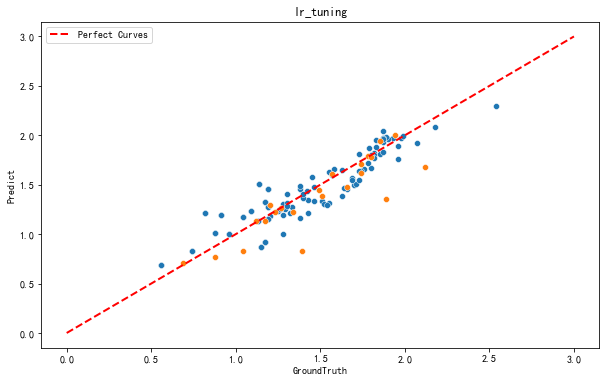

In [8]:
from sklearn.model_selection import GridSearchCV

L_para = {'fit_intercept': [True, False],   
          'normalize': [True, False],       
    
}

L_model = LinearRegression()
L_grid_search = GridSearchCV(L_model,L_para,scoring='neg_mean_squared_error',cv=5)

model = Model(L_grid_search, X_train, X_test, y_train, y_test, 'linear_reg_tuning', '1')

visual(model, 'lr_tuning', X_train, X_test, y_train, y_test)
    

# 4. Lasso

lasso train: 
 r2: 0.5298356185208524  rmse: 0.2589122969903356  mse:0.06703557753281172 error_ratio:16.04% mae:0.19450729813639564
lasso test: 
 r2: 0.6564958214805208  rmse: 0.2131764137501447 mse:0.045444183379372886 error_ratio:13.08% mae:0.16028753095027334
save result successful！


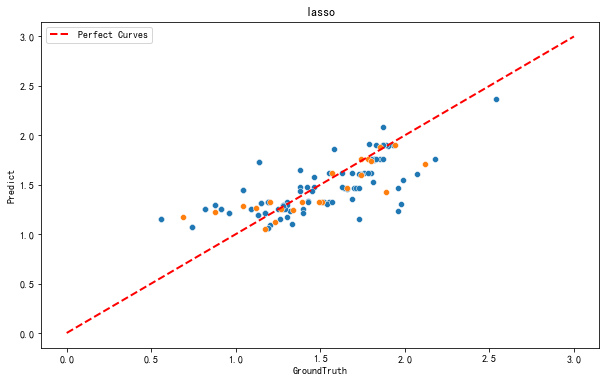

In [3]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(random_state=2024)  # alpha=0.9

model = Model(lasso_model, X_train, X_test, y_train, y_test, 'lasso', '1')

visual(model, 'lasso', X_train, X_test, y_train, y_test)

lasso_tuning train: 
 r2: 0.7078746213613825  rmse: 0.20408564547679042  mse:0.04165095068967819 error_ratio:12.78% mae:0.15682120004441746
lasso_tuning test: 
 r2: 0.7437242232266494  rmse: 0.1841310030285535 mse:0.03390422627630118 error_ratio:9.95% mae:0.13495484936446428
save result successful！


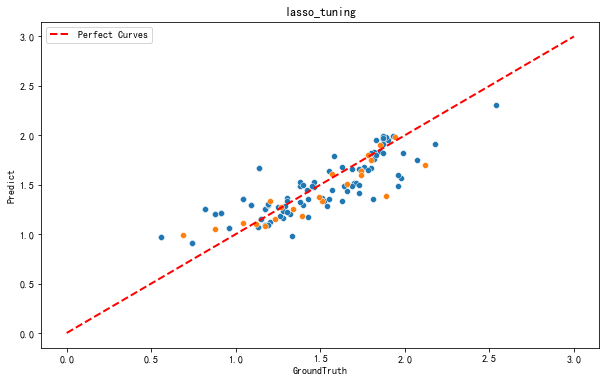

In [4]:
from sklearn.model_selection import GridSearchCV

La_para = {'alpha': [0.001,0.005,0.05],
           'selection': ['cyclic']
}

La_model = Lasso(random_state=2024)
La_grid_search = GridSearchCV(La_model,La_para,scoring='neg_mean_squared_error',cv=5)
La_grid_search.fit(X_train, y_train)


model = Model(La_grid_search, X_train, X_test, y_train, y_test, 'lasso_tuning', '1')

visual(model, 'lasso_tuning', X_train, X_test, y_train, y_test)

# 5. ridge_model

ridge train: 
 r2: 0.7999792389455408  rmse: 0.16887499644335172  mse:0.028518764423742057 error_ratio:10.5% mae:0.13400086722235532
ridge test: 
 r2: 0.8529964387106045  rmse: 0.1394559561505152 mse:0.019447963705854422 error_ratio:7.33% mae:0.1065928686219881
save result successful！


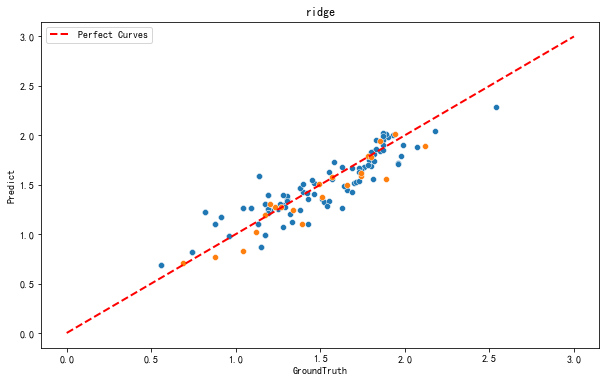

In [5]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(random_state=2024, alpha=5)  # alpha=0.5 

model = Model(ridge_model, X_train, X_test, y_train, y_test, 'ridge', '1')

visual(model, 'ridge', X_train, X_test, y_train, y_test)

ridge_tuning train: 
 r2: 0.7909280721262208  rmse: 0.17265361546681632  mse:0.02980927093376327 error_ratio:10.74% mae:0.13680496177563745
ridge_tuning test: 
 r2: 0.8543497752865736  rmse: 0.13881254579163085 mse:0.019268922869153614 error_ratio:7.25% mae:0.10594646688544483
save result successful！


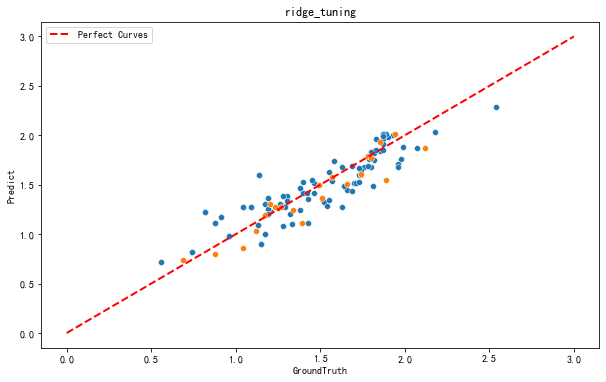

In [6]:
from sklearn.model_selection import GridSearchCV

R_para = {
    'alpha': [0.001, 0.01,0.1,0.5,5,10],  
}

R_model = Ridge(random_state=2024)
R_grid_search = GridSearchCV(R_model,R_para,scoring='neg_mean_squared_error',cv=5)

R_grid_search.fit(X_train, y_train)


model = Model(R_grid_search, X_train, X_test, y_train, y_test, 'ridge_tuning', '1')

visual(model, 'ridge_tuning', X_train, X_test, y_train, y_test)

# 6. svm_model

svm train: 
 r2: 0.8204527023534954  rmse: 0.1599989938748087  mse:0.025599678040951077 error_ratio:9.82% mae:0.1230400277565364
svm test: 
 r2: 0.7947473077684442  rmse: 0.16478495996484036 mse:0.02715408303061404 error_ratio:7.9% mae:0.1152134026669534
save result successful！


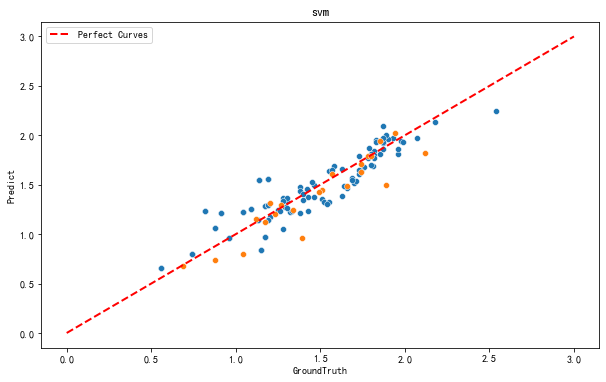

In [13]:
from sklearn import svm
svm_model = svm.SVR(kernel='linear',degree=1,gamma='scale',tol=0.001)

model = Model(svm_model, X_train, X_test, y_train, y_test, 'svm', '1')

visual(model, 'svm', X_train, X_test, y_train, y_test)

svm_tuning train: 
 r2: 0.6724825799647292  rmse: 0.216095148781096  mse:0.046697113326724014 error_ratio:12.72% mae:0.15537607413621055
svm_tuning test: 
 r2: 0.7677695443928763  rmse: 0.17528014618558663 mse:0.03072312964684062 error_ratio:11.87% mae:0.14626851543380226
save result successful！


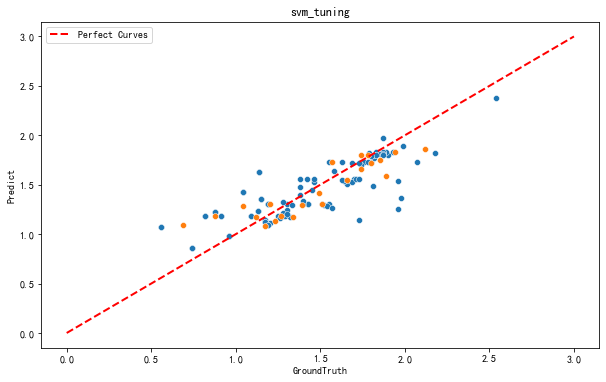

In [14]:
from sklearn.model_selection import GridSearchCV

S_model = svm.SVR()

S_para = {
     'C': [0.1, 1, 10],
    'tol': [0.001, 0.002],
}


S_grid_search = GridSearchCV(S_model,S_para,scoring='neg_mean_squared_error',cv=5)

model = Model(S_grid_search, X_train, X_test, y_train, y_test, 'svm_tuning', '1')

visual(model, 'svm_tuning', X_train, X_test, y_train, y_test)


# 7. elastic net

elastic_net train: 
 r2: 0.5370578871258569  rmse: 0.25691600483603905  mse:0.06600583354091163 error_ratio:15.82% mae:0.1917623248312419
elastic_net test: 
 r2: 0.6555631872779215  rmse: 0.21346561088502394 mse:0.04556756703051645 error_ratio:13.17% mae:0.16124534062633583
save result successful！


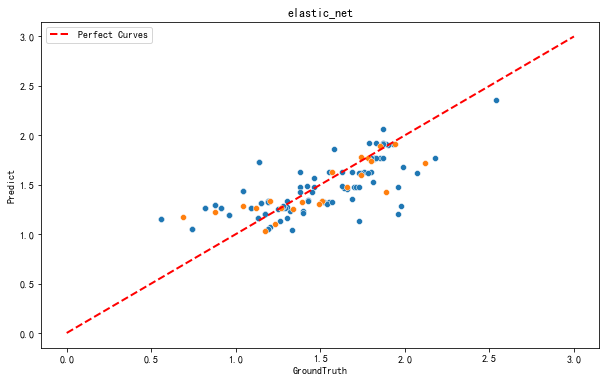

In [7]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(random_state=2024)   # selection='cyclic'

model = Model(elastic_model, X_train, X_test, y_train, y_test, 'elastic_net', '1')

visual(model, 'elastic_net', X_train, X_test, y_train, y_test)

elastic_net_tuning train: 
 r2: 0.7616411144992196  rmse: 0.18435014700225227  mse:0.03398497669975203 error_ratio:11.35% mae:0.14390644658774823
elastic_net_tuning test: 
 r2: 0.8443451010421767  rmse: 0.1435008708337974 mse:0.020592499930058208 error_ratio:6.99% mae:0.103718248798189
save result successful！


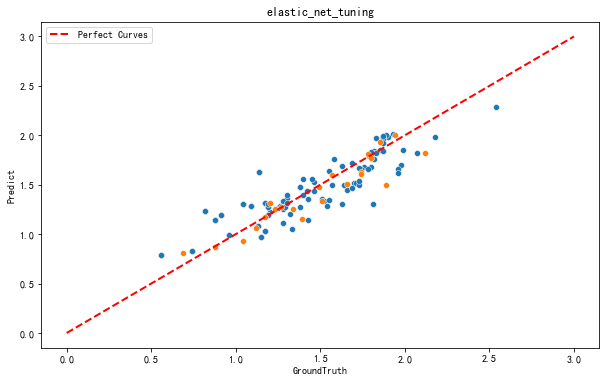

In [8]:
##from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np
from sklearn.model_selection import GridSearchCV




EN_para = {
    'alpha': [0,0.1,0.5,1],         
    'l1_ratio': [0.0001,0.001,0.005,0.05,0.1,0.5,0.9],      
}

EN_model = ElasticNet()
EN_grid_search = GridSearchCV(EN_model,EN_para,scoring='neg_mean_squared_error', cv=5)

EN_grid_search.fit(X_train, y_train)


model = Model(EN_grid_search, X_train, X_test, y_train, y_test, 'elastic_net_tuning', '1')

visual(model, 'elastic_net_tuning', X_train, X_test, y_train, y_test)

# 8. gaussian_model

gaussian train: 
 r2: 0.8710150047615697  rmse: 0.13561177836198854  mse:0.0183905544305011 error_ratio:8.49% mae:0.10646195733864412
gaussian test: 
 r2: 0.8714660855210884  rmse: 0.13040132573590651 mse:0.017004505753681995 error_ratio:7.38% mae:0.10769160238864557
save result successful！


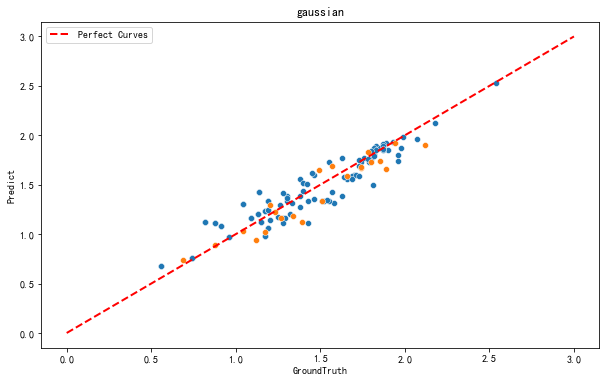

In [17]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.model_selection import GridSearchCV

gaussian_model = GaussianProcessRegressor(kernel = 1.0 * RBF(length_scale=1.0), alpha=0.02, random_state=2024)

model = Model(gaussian_model, X_train, X_test, y_train, y_test, 'gaussian', '1')

visual(model, 'gaussian', X_train, X_test, y_train, y_test)

GaussianProcessRegressor_tuning train: 
 r2: 0.8710150047615697  rmse: 0.13561177836198854  mse:0.0183905544305011 error_ratio:8.49% mae:0.10646195733864412
GaussianProcessRegressor_tuning test: 
 r2: 0.8714660855210884  rmse: 0.13040132573590651 mse:0.017004505753681995 error_ratio:7.38% mae:0.10769160238864557
save result successful！


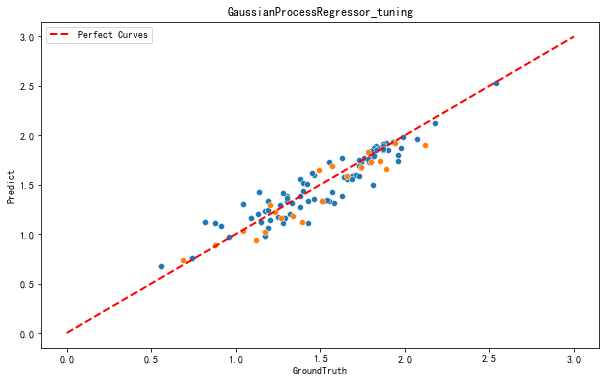

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.model_selection import GridSearchCV


kernel_1 = 1 * RBF(length_scale=1)
kernel_2 = 1.0 * Matern(length_scale=1.0, nu=1.5)

GS_grid = {
    "kernel": [kernel_1],
    "alpha": [0.01,0.02,0.03],
#     "n_restarts_optimizer": [1],
    'random_state':[2024],
}


gpr = GaussianProcessRegressor()

GS_grid_search = GridSearchCV(gpr, GS_grid, scoring='neg_mean_squared_error', cv=5)

model = Model(GS_grid_search, X_train, X_test, y_train, y_test, 'GaussianProcessRegressor_tuning', '1')

visual(model, 'GaussianProcessRegressor_tuning', X_train, X_test, y_train, y_test)

In [35]:
GaussianProcessRegressor?

# 9. KNN

knn train: 
 r2: 0.6866399156353824  rmse: 0.2113730689028897  mse:0.04467857425742575 error_ratio:11.05% mae:0.14380198019801982
knn test: 
 r2: 0.8060435537675384  rmse: 0.1601862552269587 mse:0.025659636363636353 error_ratio:9.46% mae:0.12418181818181816
save result successful！


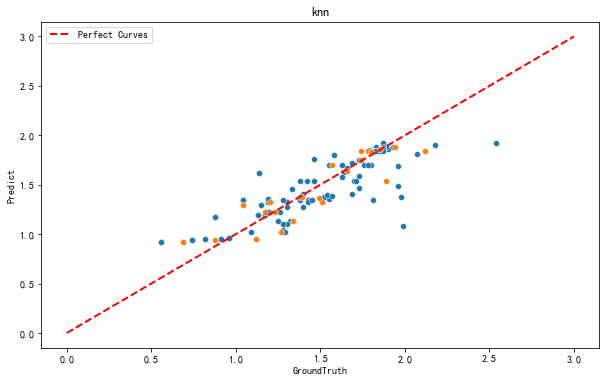

In [9]:
from sklearn.neighbors import KNeighborsRegressor

KNeighbors_model = KNeighborsRegressor()

model = Model(KNeighbors_model, X_train, X_test, y_train, y_test, 'knn', '1')

visual(model, 'knn', X_train, X_test, y_train, y_test)

knn_tuning train: 
 r2: 1.0  rmse: 0.0  mse:0.0 error_ratio:0.0% mae:0.0
knn_tuning test: 
 r2: 0.8287631035797951  rmse: 0.1505122380602721 mse:0.022653933805912026 error_ratio:7.86% mae:0.10886546059674314
save result successful！


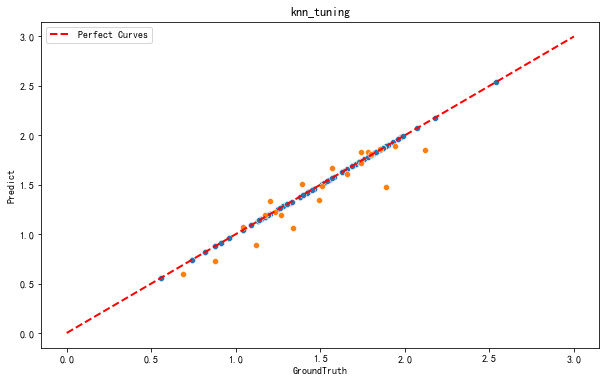

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.model_selection import GridSearchCV

knn_grid = {
    'n_neighbors': [3,4,5],
    'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
    'p': [1, 2],
}


knn = KNeighborsRegressor()

knn_grid_search = GridSearchCV(knn, knn_grid, scoring='neg_mean_squared_error', cv=5)

knn_grid_search.fit(X_train, y_train)


model = Model(knn_grid_search, X_train, X_test, y_train, y_test, 'knn_tuning', '1')

visual(model, 'knn_tuning', X_train, X_test, y_train, y_test)


In [20]:
KNeighborsRegressor?

# 10.XGBoost 

XGBoost train: 
 r2: 0.9999712293738782  rmse: 0.002025361134495566  mse:4.102087725125166e-06 error_ratio:0.09% mae:0.001402537657482795
XGBoost test: 
 r2: 0.7471947181334886  rmse: 0.18287999929192472 mse:0.03344509414101439 error_ratio:9.71% mae:0.12228627053174107
save result successful！


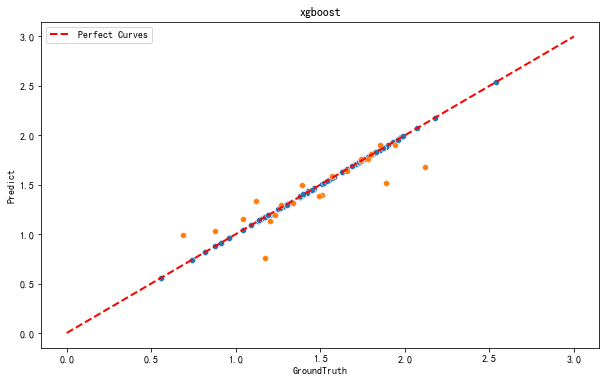

In [21]:
import xgboost as xgb
from xgboost import XGBRegressor

XGBoost_model = XGBRegressor(random_state=2024)

model = Model(XGBoost_model, X_train, X_test, y_train, y_test, 'XGBoost', '1')

# 可视化
visual(model, 'xgboost', X_train, X_test, y_train, y_test)

XGBoost_tuning train: 
 r2: 0.9811899094398109  rmse: 0.051787298727518305  mse:0.0026819243094932193 error_ratio:2.73% mae:0.03862784380959994
XGBoost_tuning test: 
 r2: 0.7850458894352405  rmse: 0.1686343398824551 mse:0.02843754058759139 error_ratio:8.83% mae:0.11583971467885106
save result successful！


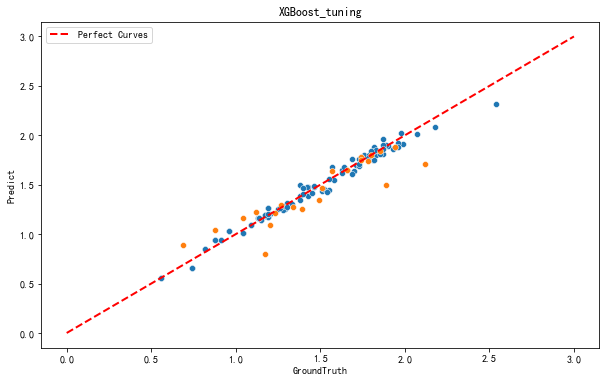

In [11]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
X_grid = {
    'n_estimators': [20,30,40],
    'max_depth': [2,3,4],
    'random_state':[2024],
    'subsample': [0.7,0.75],
    'reg_alpha': [0.1,0.2],
#     'reg_lambda': [0.1],
#     'colsample_bytree': [0.]
    
}

X_model = XGBRegressor()

X_grid_search = GridSearchCV(X_model,X_grid,scoring='neg_mean_squared_error',cv=5)

X_grid_search.fit(X_train, y_train)



model = Model(X_grid_search, X_train, X_test, y_train, y_test, 'XGBoost_tuning', '1')

# 可视化
visual(model, 'XGBoost_tuning', X_train, X_test, y_train, y_test)

In [4]:
save_model(X_grid_search, 'XGBoost_tuning_1')

save XGBoost_tuning_1 model successful
